In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

df = pd.read_csv("./kaggle/input/realdonaldtrump.csv")
df.head(5)



,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [2]:
# Some light preprocessing 
# Number of tweets (more details)
df["date"] = pd.to_datetime(df["date"])
df["date"].apply(lambda x: x.year)

df["year_month"] = df["date"].apply(lambda x: str(x.year)+"-"+str(x.month))
df["year_month"] = pd.to_datetime(df["year_month"])
year_month = pd.pivot_table(df, values = "content", index = "year_month", aggfunc = "count")

In [4]:
# Create Sentiment Analysis with Sentiment Intensity Analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

df["polarity"] = df["content"].apply(lambda x: sentiment.polarity_scores(x))

df["pos"] = df["polarity"].apply(lambda x: x["pos"])
df["neg"] = df["polarity"].apply(lambda x: x["neg"])
df["compound"] = df["polarity"].apply(lambda x: x["compound"])


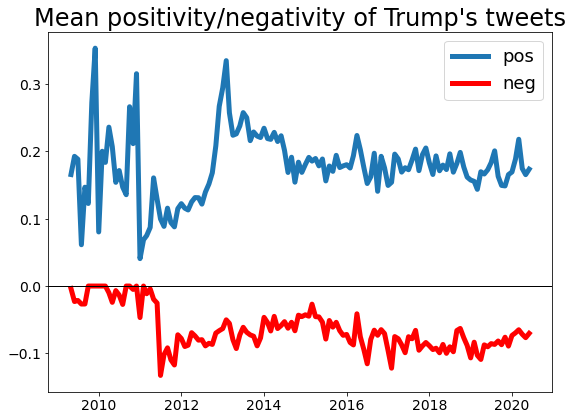

In [5]:
# Create the visualization
fig = plt.figure(figsize = (7,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Mean positivity/negativity of Trump's tweets", fontsize=24)
ax.tick_params(labelsize=14)

# Positivity plot
year_month = pd.pivot_table(df, values = "pos", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5)

# Negativity plot
year_month = pd.pivot_table(df, values = "neg", index = "year_month", aggfunc = "mean").apply(lambda x: -x)
ax.plot(year_month, lw = 5, color = "red")

# Add the "president" and "corona" lines
ax.legend(["pos","neg"], fontsize=18)
plt.axhline(0, 0 ,1, color = "black", lw = 1)


#plt.axvline("20-01-2020", 0 ,1, color = "orange", lw = 3)
#plt.text("9-12-2019", 0.39, "Corona", fontsize = 18, color = "orange")

In [6]:
df.to_csv('./output/results/nltk_results.csv')